## Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how= "left", on = "Mouse ID")

mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_total = len(mouse_study_complete['Mouse ID'].unique())
mice_total

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_study= mouse_study_complete[mouse_study_complete[['Mouse ID', 'Timepoint']].duplicated()== True]
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_study= mouse_study_complete[mouse_study_complete[['Mouse ID', 'Timepoint']].duplicated()== True]
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study= mouse_study_complete.loc[mouse_study_complete['Mouse ID'] !='g989']
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_study2 = len(clean_study['Mouse ID'].unique())
clean_study2

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate 
#the following properties of each drug regimen: mean, median, variance, standard deviation, 
#and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_study.groupby(["Drug Regimen"])

drug_reg_mean = summary_statistics['Tumor Volume (mm3)'].mean()
drug_reg_median = summary_statistics['Tumor Volume (mm3)'].median()
drug_reg_variance = summary_statistics['Tumor Volume (mm3)'].var()
drug_reg_sd = summary_statistics['Tumor Volume (mm3)'].std()
drug_reg_sem = summary_statistics['Tumor Volume (mm3)'].sum()

summary_statistics_df = pd.DataFrame({
    "Mean": drug_reg_mean,
    "Median": drug_reg_median,
    "Variance": drug_reg_variance,
    "Standard Dev": drug_reg_sd,
    "Sem": drug_reg_sem 
    
})

summary_statistics_df



,Mean,Median,Variance,Standard Dev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,9355.420462
Ceftamin,52.591172,51.776157,39.290177,6.268188,9361.228582
Infubinol,52.884795,51.820584,43.128684,6.567243,9413.493529
Ketapril,55.235638,53.698743,68.553577,8.279709,10384.299876
Naftisol,54.331565,52.509285,66.173479,8.134708,10105.671026
Placebo,54.033581,52.288934,61.168083,7.821003,9780.078122
Propriva,52.320930,50.446266,43.852013,6.622085,7743.497619
Ramicane,40.216745,40.673236,23.486704,4.846308,9169.417875
Stelasyn,54.233149,52.431737,59.450562,7.710419,9816.199991


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_statistics = clean_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_statistics 


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

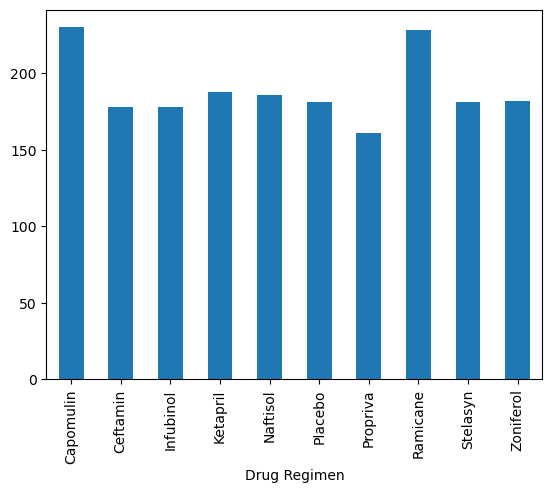

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_study_complete.groupby(['Drug Regimen'])['Timepoint'].count().plot.bar()


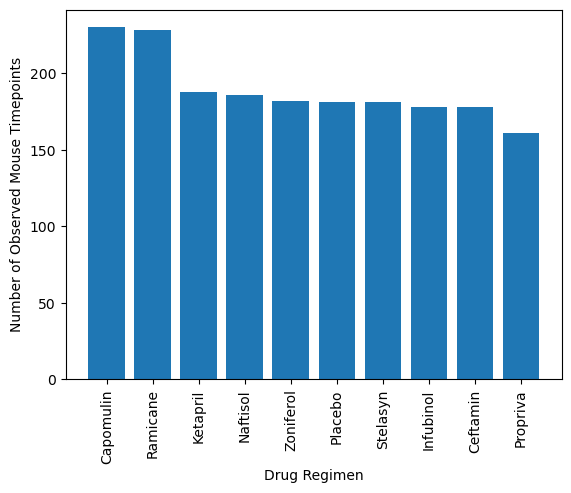

In [29]:
counts = mouse_study_complete['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

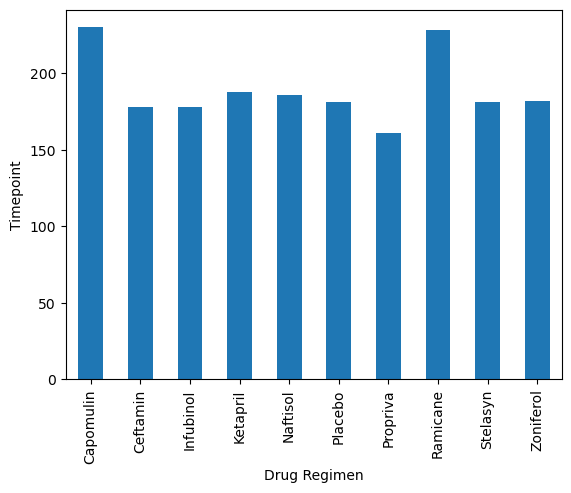

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint = mouse_study_complete.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.plot(kind="bar")
plt.ylabel('Timepoint')
plt.xlabel('Drug Regimen')
plt.show;

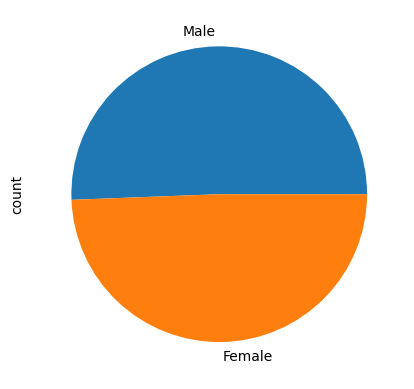

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Panda
counts = mouse_study_complete.Sex.value_counts()
counts.plot(kind='pie') 
plt.show()


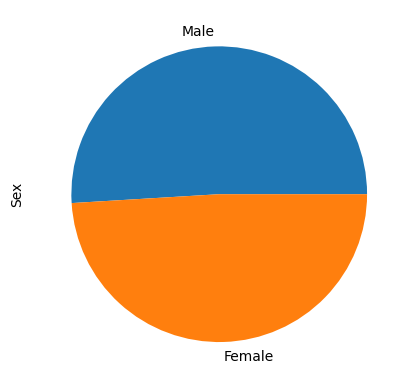

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotplt.pie
pie_plot = clean_study['Sex'].value_counts()
plt.pie(pie_plot, labels = ['Male', 'Female'])
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
mouse_study_complete.groupby(['Mouse ID'])['Timepoint'].max()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tm_and_tp = mouse_study_complete.groupby(['Mouse ID'])['Timepoint'].max()
final_tm_and_tp = final_tm_and_tp.reset_index()
                                                     
final_merge = pd.merge(final_tm_and_tp, mouse_study_complete, on= ["Mouse ID", 'Timepoint'], how="left")
final_merge    




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in Treatments: 
    Final_tumor_volume = final_merge.loc[final_merge['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    #print(Final_tumor_volume)
    
 # add subset 
    tumor_volume_list.append(Final_tumor_volume)
# Determine outliers using upper and lower bounds
    quartiles = Final_tumor_volume.quantile([.25,.5,.75])
    #print(quartiles)
   # break
    bquartile= quartiles[0.25]
    tquartile= quartiles[0.75]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = tquartile - bquartile
    lower_b = bquartile - (1.5*iqr)
    higher_b = tquartile + (1.5*iqr)    
    outliers = Final_tumor_volume.loc[(Final_tumor_volume < lower_b) | (Final_tumor_volume > higher_b)]     
    
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


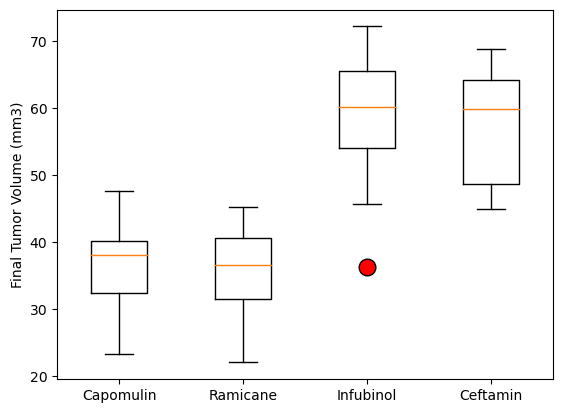

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_volume_list, labels = Treatments, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = mouse_study_complete.loc[mouse_study_complete['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


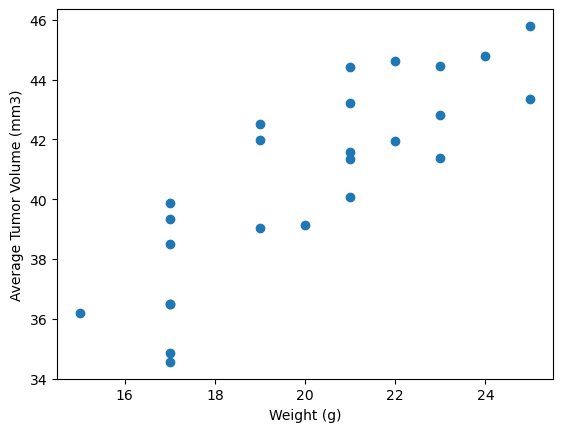

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = mouse_study_complete.loc[mouse_study_complete['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [24]:
st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0]

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)

The correlation between mouse weight and the average tumor volume is 0.84


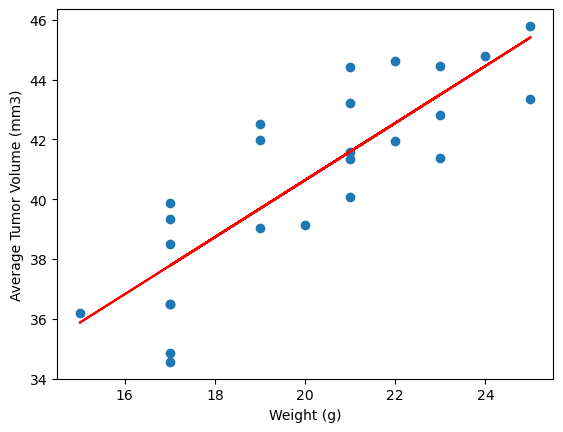

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
